# Supplementary Information
# Improving Equations of State for Hard Chains Based on Thermodynamic Perturbation Theory

*Juan M. Uceda and Andrés Mejía*

In [45]:
import numpy as np
import sympy as sp
eta = sp.symbols('eta')

In [2]:
dat_3_2 = np.loadtxt("lin3-2.dat")
dat_3_7 = np.loadtxt("lin3-7.dat")
dat_4 = np.loadtxt("lin4.dat")
dat_8 = np.loadtxt("lin8.dat")
dat_16 = np.loadtxt("lin16.dat")
dat_64 = np.loadtxt("lin64.dat")
dat_4_2 = np.loadtxt("lin4-2.dat")
dat_4_4 = np.loadtxt("lin4-4.dat")
dat_4_6 = np.loadtxt("lin4-6.dat")
dat_5_2 = np.loadtxt("lin5-2.dat")
dat_6_2 = np.loadtxt("lin6-2.dat")
dat_7_2 = np.loadtxt("lin7-2.dat")
dat_8_2 = np.loadtxt("lin8-2.dat")
dat_8_4 = np.loadtxt("lin8-4.dat")
dat_8_6 = np.loadtxt("lin8-6.dat")
dat_16_2 = np.loadtxt("lin16-2.dat")
dat_16_3 = np.loadtxt("lin16-3.dat")
dat_16_4 = np.loadtxt("lin16-4.dat")
dat_16_5 = np.loadtxt("lin16-5.dat")
dat_16_6 = np.loadtxt("lin16-6.dat")
dat_32_2 = np.loadtxt("lin32-2.dat")
dat_32_5 = np.loadtxt("lin32-5.dat")
dat_51_3 = np.loadtxt("lin51-3.dat")
dat_51_5 = np.loadtxt("lin51-5.dat")
dat_64_2 = np.loadtxt("lin64-2.dat")
dat_96_2 = np.loadtxt("lin96-2.dat")
dat_192_2 = np.loadtxt("lin192-2.dat")
dat_201_3 = np.loadtxt("lin201-3.dat")
dat_g21 = np.loadtxt("g21.dat")

In [3]:
def Zmon():
    import sympy as sp
    eta = sp.symbols('eta')
    
    Zmon = (1+eta+eta**2-eta**3)/(1-eta)**3
    
    return Zmon

In [4]:
def g11():
    import sympy as sp
    eta = sp.symbols('eta')
    
    g11 = (1-eta/2)/(1-eta)**3
    
    return g11

In [5]:
def g22(method):
    import sympy as sp
    eta = sp.symbols("eta")

    if method == "MC":

        g22 = (1+2*eta+26.45031*eta**6.17)/2/(1-eta)**2

    elif method == "d2":
        sfun = -Z2(4).evalf(subs={eta: 1.0})
        c2 = sfun/(1-sfun)
        g22 = g11()*(1.0+c2*eta)
    
    return g22

In [6]:
def Z1(m):
    """
    This subroutine defines the monodisperse first-order contribution to the chain term of a linear hard chain according 
    to Chapman's equation within Wertheim's perturbation formalism.
    """
    import sympy as sp
    eta = sp.symbols("eta")
    
    Z1 = -(m-1)*(1+eta*sp.diff(sp.log(g11()), eta))

    return Z1

In [7]:
def lam2():
    import sympy as sp
    eta = sp.symbols("eta")
    
    lam2 = 0.2336*eta+0.1067*eta**2
    
    return lam2

In [8]:
def Z2(m):
    """
    This subroutine defines the second-order contribution to the monodisperse solution of a linear hard chain according 
    to Phan et al.'s equation within Wertheim's perturbation formalism.
    """
    import sympy as sp
    eta = sp.symbols('eta')
    
    f = sp.sqrt(1+4*lam2())
    Z2 = -2*eta*sp.diff(lam2(), eta)/f**2*(m*f/(1+f)*(1+((1-f)/(1+f))**(m-1))/(1-((1-f)/(1+f))**m)-1)
    
    return Z2

In [9]:
def gk1(method, k):
    import sympy as sp
    from sympy import symarray
    from sympy import lambdify
    from scipy.optimize import fsolve
    import math
    eta = sp.symbols("eta")
    
    if k == 1:
        gk1 = g11()
    else:
        if method == "ppy":
            gk1 = 1.0/0.75*(g11()-0.25/(1-eta))

        elif method == "sp2":
            gk1 = g11()
            m = k+1
            a = np.zeros(m)
            a[0] = 0
            a[1] = 0
            for k in range(2, m):
                fun = -Z2(k+1)+2*Z2(k)-Z2(k-1)
                sfun = fun.evalf(subs={eta: 1.0})
                a[k] = sfun/(1.0-sfun)
                gk1 = gk1*(1.0+a[k]*eta)
                
    return gk1

In [10]:
def Z1d(m, method):
    """
    This subroutine defines the dimer correction for Chapman's TPT1.
    """
    import sympy as sp
    eta = sp.symbols("eta")

    if method == "MC":
        Z1d = -(m/2-1)*eta*sp.diff(sp.log(g22("MC")/g11()), eta)

    elif method == "d2":
        Z1d = -(m/2-1)*eta*sp.diff(sp.log(g22("d2")/g11()), eta)
        
    return Z1d

In [11]:
def Zsppy(m):
    """
    This subroutine defines the compressibility factor of hard chains according to the sequential polimerization approach.
    """
    import sympy as sp
    eta = sp.symbols("eta")
    
    Zsp = 0
    for i in range(1, m):
        Zsp = Zsp-(1+eta*sp.diff(sp.log(gk1("ppy", i)), eta))

    return Zsp

In [12]:
def Zsp2(m):
    """
    This subroutine defines the compressibility factor of hard chains according to the sequential polimerization approach.
    """
    import sympy as sp
    eta = sp.symbols("eta")
    a = np.zeros(m)
    Zsp = 0.0
    for k in range(2, m):
        fun = -Z2(k+1)+2*Z2(k)-Z2(k-1)
        sfun = fun.evalf(subs={eta: 1.0})
        a[k] = sfun/(1.0-sfun)
        Zsp = Zsp-eta*(m-k)*a[k]/(1.0+a[k]*eta)

    return Zsp

In [13]:
def Zchain(n, m):
    import sympy as sp
    eta = sp.symbols('eta')
    
    if n == 1:
        Zchain = Z1(m)
    elif n == "1dmc":
        Zchain = Z1(m)+Z1d(m, "MC")
    elif n == "1d2":
        Zchain = Z1(m)+Z1d(m, "d2")
    elif n == 2:
        Zchain = Z1(m)+Z2(m)
    elif n == "sppy":
        Zchain = Zsppy(m)
    elif n == "sp2":
        Zchain = Z1(m)+Zsp2(m)
    
    return Zchain

In [14]:
def Z(n, m):
    import sympy as sp
    eta = sp.symbols('eta')
    
    Z = m*Zmon()+Zchain(n, m)
    
    return Z

In [15]:
x = np.linspace(0.0, 0.5, num=100)
n = len(x)
g21emp = np.zeros_like(x)
g21ppy = np.zeros_like(x)
g21sp2 = np.zeros_like(x)
for i in range(n):
    g21emp[i] = 1/0.7854*(32.918*x[i]**3-4.6197*x[i]**2+2.6412*x[i]+0.7854)
    g21ppy[i] = gk1("ppy", 2).evalf(subs={eta: x[i]})
    g21sp2[i] = gk1("sp2", 2).evalf(subs={eta: x[i]})

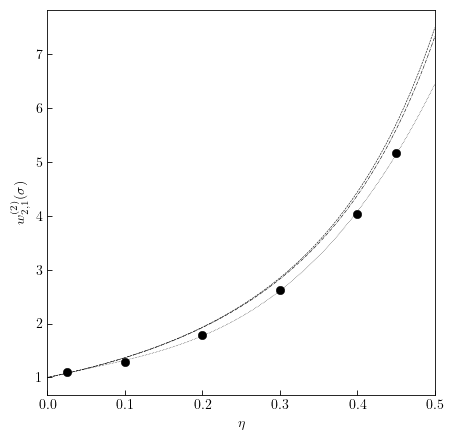

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.scatter(dat_g21[:,0], dat_g21[:,1]/0.7854, facecolors="black", edgecolors="black", linewidth=0.4)
ax.plot(x, g21emp, color="black", linestyle="dotted", linewidth=0.4)
ax.plot(x, g21ppy, color="black", linestyle="dashdot", linewidth=0.4)
ax.plot(x, g21sp2, color="black", linestyle="dashed", linewidth=0.4)
plt.xlim([0.0, 0.5])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$w^{(2)}_{2,1}(\sigma)$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.savefig("w21.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [20]:
m = 3
data = dat_3_7
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2_2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2_2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2_2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2_2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2-2:", AAPDsp2_2)

TPT1-M: 2.2629393708318952
TPT1-D: 1.0793458492111645
TPT2: 1.5828800021702394
SP-PY: 1.091507224832955
SP2-2: 1.1362074261658899


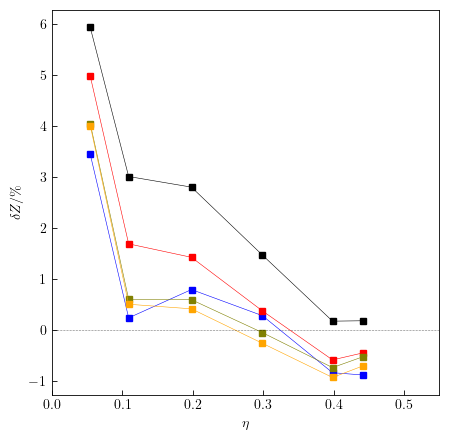

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2_2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.savefig("dZ_3.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [22]:
m = 4
data = dat_4
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 2.5336674073722367
TPT1-D: 0.5753798977812086
TPT2: 1.019147054220527
SP-PY: 0.22398027678995452
SP2: 0.37741043467857016
TPT1-D2: 0.2527787110322536


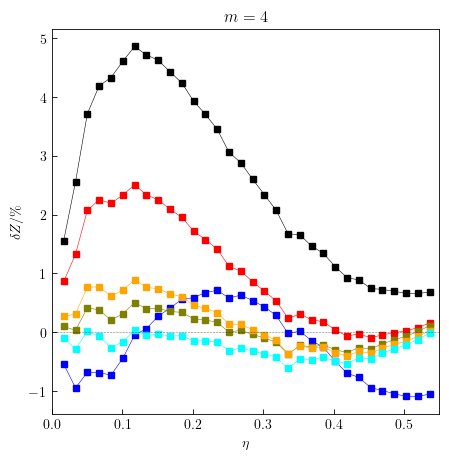

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.title(r"$m=4$")
plt.savefig("dZ_4.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [24]:
m = 8
data = dat_8
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 5.769252117511946
TPT1-D: 1.1932692715693727
TPT2: 2.8836326171649262
SP-PY: 0.8501085461880005
SP2: 1.3505287084263151
TPT1-D2: 0.4669214941226102


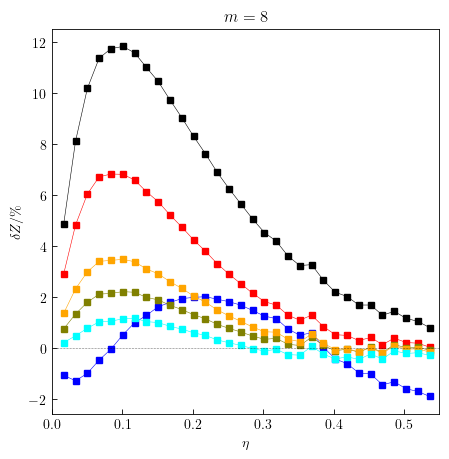

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.title(r"$m=8$")
plt.savefig("dZ_8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [26]:
m = 16
data = dat_16
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 9.085952799748346
TPT1-D: 1.8611040403945718
TPT2: 4.978489822463535
SP-PY: 2.002928023051794
SP2: 2.814613374305006
TPT1-D2: 1.443863006515056


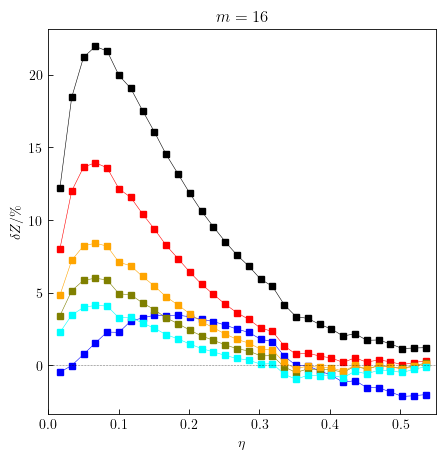

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.title(r"$m=16$")
plt.savefig("dZ_16.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [28]:
m = 64
data = dat_64
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 15.350654534996924
TPT1-D: 3.6426566599406653
TPT2: 9.332528075796708
SP-PY: 4.55533675429602
SP2: 5.972363879456504
TPT1-D2: 3.5982071454813815


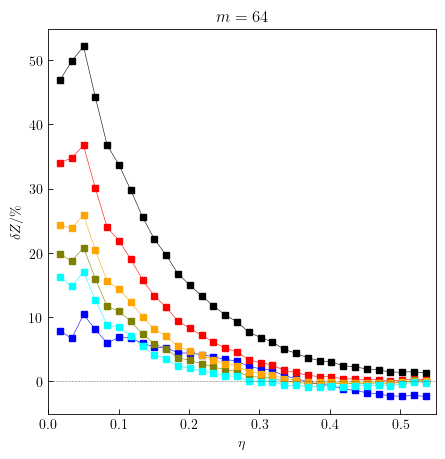

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
plt.title(r"$m=64$")
plt.savefig("dZ_64.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [31]:
m = 96
data = dat_96_2
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 6.418697384274777
TPT1-D: 2.1915704960820808
TPT2: 3.675248903347598
SP-PY: 2.3544333296164304
SP2: 2.6453375855519212
TPT1-D2: 1.835319525931219


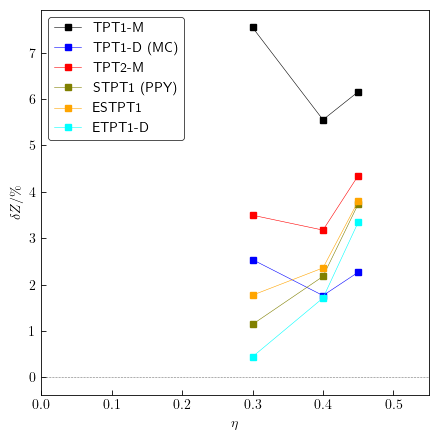

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
legend = ax.legend(["TPT1-M", "TPT1-D (MC)", "TPT2-M", "STPT1 (PPY)", "ESTPT1", "ETPT1-D"], edgecolor="black")
frame = legend.get_frame()
frame.set_linewidth(0.6)
plt.savefig("dZ_96.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [33]:
m = 192
data = dat_192_2
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 14.150338742824339
TPT1-D: 3.441558231917439
TPT2: 8.478259573861619
SP-PY: 4.197672090440445
SP2: 5.467393574785544
TPT1-D2: 3.0771082637986646


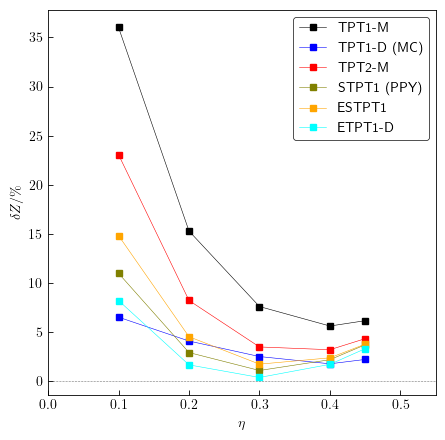

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
legend = ax.legend(["TPT1-M", "TPT1-D (MC)", "TPT2-M", "STPT1 (PPY)", "ESTPT1", "ETPT1-D"], edgecolor="black")
frame = legend.get_frame()
frame.set_linewidth(0.6)
plt.savefig("dZ_192.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [35]:
m = 201
data = dat_201_3
n = len(data[:,0])
sZ1 = np.zeros(n)
sZ1dmc = np.zeros(n)
sZ2 = np.zeros(n)
sZsppy = np.zeros(n)
sZsp2 = np.zeros(n)
sZ1d2 = np.zeros(n)
for i in range(n):
    sZ1[i] = Z(1, m).evalf(subs={eta: data[i,0]})
    sZ1dmc[i] = Z("1dmc", m).evalf(subs={eta: data[i,0]})
    sZ2[i] = Z(2, m).evalf(subs={eta: data[i,0]})
    sZsppy[i] = Z("sppy", m).evalf(subs={eta: data[i,0]})
    sZsp2[i] = Z("sp2", m).evalf(subs={eta: data[i,0]})
    sZ1d2[i] = Z("1d2", m).evalf(subs={eta: data[i,0]})

AAPD1 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1/data[:,1]-1)))
AAPD1dmc = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1dmc/data[:,1]-1)))
AAPD2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ2/data[:,1]-1)))
AAPDsppy = 1/(len(data[:,0]))*np.sum(abs(100*(sZsppy/data[:,1]-1)))
AAPDsp2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZsp2/data[:,1]-1)))
AAPD1d2 = 1/(len(data[:,0]))*np.sum(abs(100*(sZ1d2/data[:,1]-1)))

print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 14.101151842846557
TPT1-D: 4.204990999634249
TPT2: 8.50333042020148
SP-PY: 5.182410573943129
SP2: 6.039538952397329
TPT1-D2: 4.815051507050211


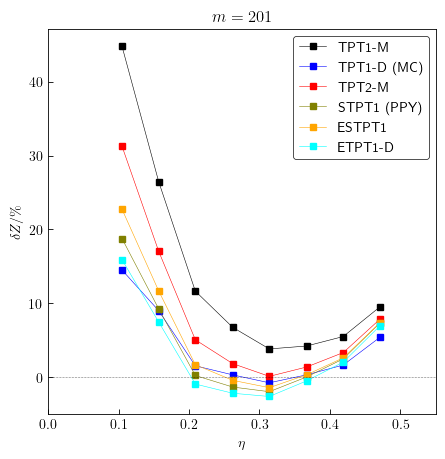

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.plot(data[:,0], 100*(sZ1/data[:,1]-1), marker="s", color="black", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1dmc/data[:,1]-1), marker="s", color="blue", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ2/data[:,1]-1), marker="s", color="red", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsppy/data[:,1]-1), marker="s", color="olive", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZsp2/data[:,1]-1), marker="s", color="orange", linewidth=0.4, markersize=4)
ax.plot(data[:,0], 100*(sZ1d2/data[:,1]-1), marker="s", color="cyan", linewidth=0.4, markersize=4)
ax.axhline(y=0, color="black", linewidth=0.4, linestyle="dotted")
plt.xlim([0.0, 0.55])
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\delta Z/\%$")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
legend = ax.legend(["TPT1-M", "TPT1-D (MC)", "TPT2-M", "STPT1 (PPY)", "ESTPT1", "ETPT1-D"], edgecolor="black")
frame = legend.get_frame()
frame.set_linewidth(0.6)
plt.savefig("dZ_201.pdf", format="pdf", bbox_inches="tight")
plt.title(r"$m=201$")
plt.show()

In [37]:
def B2r(n, m):
    import math
    import sympy as sp
    eta = sp.symbols('eta')
    
    fun = 1/m*sp.diff(Z(n, m), eta)
    B2r = fun.evalf(subs={eta: 0.0})*math.pi/6.0
    
    return B2r

In [38]:
mm = np.array([2, 3, 4, 6, 8, 12, 16, 20, 24, 32, 64, 128])

In [39]:
dat_B2r = np.loadtxt("B2rlinear.dat")

In [40]:
l = len(mm)
B2r1 = np.zeros(l)
B2r1dmc = np.zeros(l)
B2r2 = np.zeros(l)
B2rsppy = np.zeros(l)
B2rsp2 = np.zeros(l)
B2r1d2 = np.zeros(l)
for i in range(l):
    B2r1[i] = B2r(1, mm[i])
    B2r1dmc[i] = B2r("1dmc", mm[i])
    B2r2[i] = B2r(2, mm[i])
    B2rsppy[i] = B2r("sppy", mm[i])
    B2rsp2[i] = B2r("sp2", mm[i])
    B2r1d2[i] = B2r("1d2", mm[i])

In [41]:
AAPD1 = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2r1/dat_B2r[:,1]-1)))
AAPD1d = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2r1dmc/dat_B2r[:,1]-1)))
AAPD2 = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2r2/dat_B2r[:,1]-1)))
AAPDsppy = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2rsppy/dat_B2r[:,1]-1)))
AAPDsp2 = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2rsp2/dat_B2r[:,1]-1)))
AAPDsp2e = 1/(len(dat_B2r[:,0]))*np.sum(abs(100*(B2r1d2/dat_B2r[:,1]-1)))
print("TPT1-M:", AAPD1)
print("TPT1-D:", AAPD1dmc)
print("TPT2:", AAPD2)
print("SP-PY:", AAPDsppy)
print("SP2:", AAPDsp2)
print("TPT1-D2:", AAPD1d2)

TPT1-M: 61.60922273748932
TPT1-D: 4.204990999634249
TPT2: 43.386790915382846
SP-PY: 22.910102088572167
SP2: 29.069595061728453
TPT1-D2: 4.815051507050211


In [42]:
mm = np.linspace(2, 130, num=129, dtype=int)
l = len(mm)
B2r1 = np.zeros(l)
B2r1dmc = np.zeros(l)
B2r2 = np.zeros(l)
B2rsppy = np.zeros(l)
B2rsp2 = np.zeros(l)
B2r1d2 = np.zeros(l)
for i in range(l):
    B2r1[i] = B2r(1, mm[i])
    B2r1dmc[i] = B2r("1dmc", mm[i])
    B2r2[i] = B2r(2, mm[i])
    B2rsppy[i] = B2r("sppy", mm[i])
    B2rsp2[i] = B2r("sp2", mm[i])
    B2r1d2[i] = B2r("1d2", mm[i])

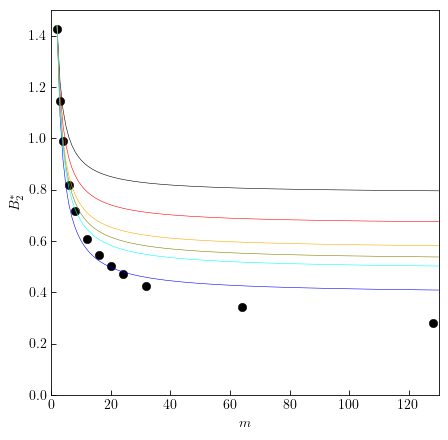

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize=(5,5))
ax.tick_params(direction='in')
ax.scatter(dat_B2r[:,0], dat_B2r[:,1], facecolors="black", edgecolors="black", linewidth=0.4)
ax.plot(mm,  B2r1, linewidth=0.4, color="black", linestyle="solid")
ax.plot(mm,  B2r1dmc, linewidth=0.4, color="blue", linestyle="solid")
ax.plot(mm,  B2r2, linewidth=0.4, color="red", linestyle="solid")
ax.plot(mm,  B2rsppy, linewidth=0.4, color="olive", linestyle="solid")
ax.plot(mm,  B2rsp2, linewidth=0.4, color="orange", linestyle="solid")
ax.plot(mm,  B2r1d2, linewidth=0.4, color="cyan", linestyle="solid")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.6)
ax.tick_params(width=0.6)
ax.set_xlim([0, 130])
ax.set_ylim([0, 1.5])
ax.set_xlabel(r"$m$")
ax.set_ylabel(r"$B_{2}^{\ast}$")
plt.savefig("B2r_linear.eps", format="eps", bbox_inches="tight")
plt.show()